# Projeto Ciência de Dados - Previsão de Vendas

- Prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões
- Cada linha é um mês

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados

In [3]:
import pandas as pd

tabela = pd.read_csv("advertising.csv")
display(tabela)


,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

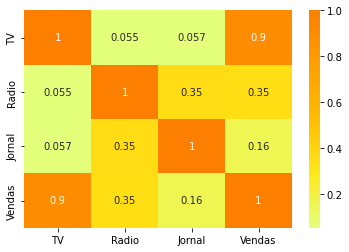

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


#análise de correlação
sns.heatmap(tabela.corr(), cmap="Wistia", annot=True)
plt.show()
#correlação alta (positiva) entre investimento em TV e vendas = 0,9


#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [23]:
from sklearn.model_selection import train_test_split

x = tabela[["TV", "Radio", "Jornal"]]
y = tabela["Vendas"]

x_treino, x_teste, y_treino, y_test = train_test_split(x, y, random_state=1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

modelo_reglinear = LinearRegression()
modelo_forestd = RandomForestRegressor()

modelo_reglinear.fit(x_treino, y_treino)
modelo_forestd.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [27]:
from sklearn.metrics import r2_score

prev_reglinear = modelo_reglinear.predict(x_teste)
prev_forestd = modelo_forestd.predict(x_teste)

print(r2_score(y_test, prev_reglinear))
print(r2_score(y_test, prev_forestd))

0.9048917241361681
0.9664644501217292


#### Visualização Gráfica das Previsões

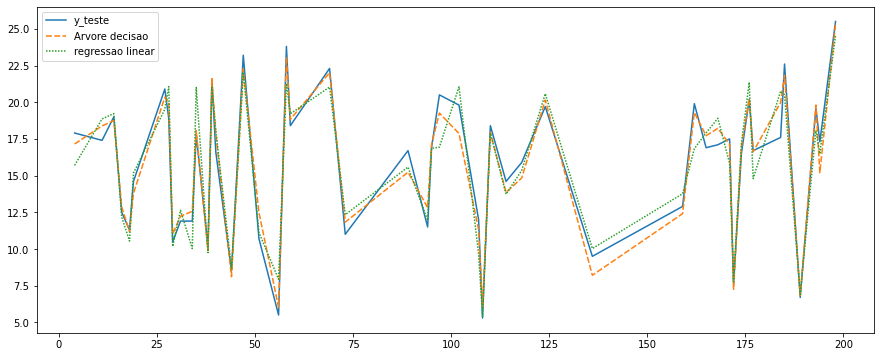

In [28]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_test
tabela_auxiliar["Arvore decisao"] = prev_forestd
tabela_auxiliar["regressao linear"] = prev_reglinear

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [31]:
#melhor modelo é árvore de decisão

novos = pd.read_csv("novos.csv")
display(novos)
print(modelo_forestd.predict(novos))

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.805  8.568 20.279]
